<a href="https://colab.research.google.com/github/Aksharalakshmim2001/OIBSIP/blob/main/OasisTask2_Email_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

 Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Loading the Dataset

In [16]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

Displaying the Dataset

In [17]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Display the columns

In [18]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [19]:
df = df[['v1', 'v2']]
print(df.columns)

Index(['v1', 'v2'], dtype='object')


Dataset Information

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Display the Counts

In [21]:
print(df['v1'].value_counts())

ham     4825
spam     747
Name: v1, dtype: int64


Visualization

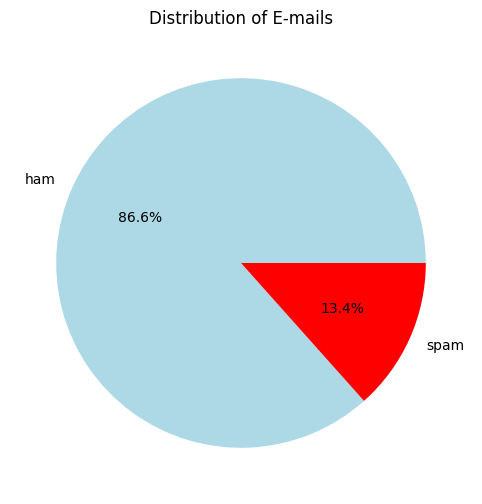

In [22]:
plt.figure(figsize=(8, 6))
df['v1'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Distribution of E-mails')
plt.ylabel('')
plt.show()


Data Cleaning and Preprocessing

In [23]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [24]:
df['Category'] = df['v1'].map({'spam': 0, 'ham': 1})
df['Message'] = df['v2'].str.strip().str.lower()

Model Training and Testing

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

Support Vector Machine

In [26]:
from sklearn.svm import SVC
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 98.30%


Confusion Matrix

In [27]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Confusion Matrix:
[[133  17]
 [  2 963]]


Testing

In [28]:
input_messages = ["This message is brought to you by GMW Ltd. and is not connected to the", "Some friends want me to drive em someplace, probably take a while"]
input_messages_tfidf = tfidf_vectorizer.transform(input_messages)
predictions = svm_classifier.predict(input_messages_tfidf)
predicted_labels = ["ham" if prediction == 1 else "spam" for prediction in predictions]
for msg, label in zip(input_messages, predicted_labels):
    print("Input Message:", msg)
    print("Predicted Label:", label)
    print()

Input Message: This message is brought to you by GMW Ltd. and is not connected to the
Predicted Label: spam

Input Message: Some friends want me to drive em someplace, probably take a while
Predicted Label: ham

